<a href="https://colab.research.google.com/github/TABEYWICKRAMA/Python_series_end-to-end/blob/main/TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf # now import the tensorflow module
print(tf.version) # make sure the version is 2.x


<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [2]:
string = tf.Variable("this is a string", tf.string) 
number = tf.Variable(324, tf.int16)
floating = tf.Variable(3.567, tf.float64)

In [3]:
string

<tf.Variable 'Variable:0' shape=() dtype=string, numpy=b'this is a string'>

In [4]:
number

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=324>

In [7]:
rank1_tensor = tf.Variable(["Test"], tf.string) 
rank2_tensor = tf.Variable([["1,2"], ["3, 4"]], tf.int16)

In [9]:
tf.rank(rank1_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [10]:
tf.rank(rank2_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [13]:
rank1_tensor.shape

TensorShape([1])

In [14]:
rank2_tensor.shape

TensorShape([2, 1])

In [15]:
tensor1 = tf.ones([1,2,3]) # tf.ones() creates a shape [1,2,3] tensor full of ones
tensor2 = tf.reshape(tensor1, [2,3,1]) # reshape existing data to shape [2,3,1]
tensor3 = tf.reshape(tensor2, [3, -1]) # -1 tells the tensor to calculate the size of the dimension in that place and this will reshape the tensor to [3,3]

In [18]:
print(tensor1)


tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)


In [19]:
print(tensor2)


tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)


In [20]:
print(tensor3)

tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


In [21]:
# Creating a 2D tensor
matrix = [[1,2,3,4,5],
 [6,7,8,9,10],
 [11,12,13,14,15],
 [16,17,18,19,20]]
tensor = tf.Variable(matrix, dtype=tf.int32) 
print(tf.rank(tensor))
print(tensor.shape)

tf.Tensor(2, shape=(), dtype=int32)
(4, 5)


In [22]:
three = tensor[0,2] # selects the 3rd element from the 1st row
print(three) # -> 3


tf.Tensor(3, shape=(), dtype=int32)


In [23]:
row1 = tensor[0] # selects the first row
print(row1)


tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)


In [24]:
column1 = tensor[:, 0] # selects the first column
print(column1)

tf.Tensor([ 1  6 11 16], shape=(4,), dtype=int32)


In [25]:
column_1_in_row_2_and_3 = tensor[1:3, 0]
print(column_1_in_row_2_and_3)

tf.Tensor([ 6 11], shape=(2,), dtype=int32)


In [26]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [27]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [28]:
fashion_mnist = keras.datasets.fashion_mnist # load dataset

In [29]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # split into tetsing and training

4431872/4422102 [==============================] - 0s 0us/step


In [30]:
train_images.shape

(60000, 28, 28)

In [31]:
train_images[0,23,23] # look at one pixel

194

In [32]:
train_labels[:10] # look at the first 10 training labels

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [33]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 
'Ankle boot']

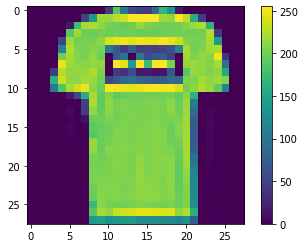

In [37]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()


In [38]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [39]:
model = keras.Sequential([
 keras.layers.Flatten(input_shape=(28, 28)), # input layer (1)
 keras.layers.Dense(128, activation='relu'), # hidden layer (2)
 keras.layers.Dense(10, activation='softmax') # output layer (3)
])


In [40]:
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])


In [41]:
model.fit(train_images, train_labels, epochs=10) # we pass the data, labels and epochs


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5015 - accuracy: 0.8233
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3770 - accuracy: 0.8642
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3385 - accuracy: 0.8771
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3145 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2971 - accuracy: 0.8896
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2809 - accuracy: 0.8947
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2697 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2584 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2500 - accuracy: 0.9065
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

In [42]:
test_loss, test_acc = model.evaluate(test_images, test_labels) 
print('Test accuracy:', test_acc)


313/313 [==============================] - 0s 1ms/step - loss: 0.3362 - accuracy: 0.8821
Test accuracy: 0.882099986076355


In [43]:
predictions = model.predict(test_images)

In [44]:
predictions[0]

array([1.3467509e-06, 4.6056432e-08, 7.0676123e-07, 5.5476490e-09,
       2.2570345e-07, 2.9879225e-02, 6.5555041e-06, 3.6026079e-03,
       9.3182757e-07, 9.6650833e-01], dtype=float32)

In [45]:
np.argmax(predictions[0])

9

In [46]:
test_labels[0]

9